In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")

In [7]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [10]:
df.shape

(4746, 12)

In [11]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [12]:
df.isnull()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,False,False,False,False,False,False,False,False,False,False,False,False
4742,False,False,False,False,False,False,False,False,False,False,False,False
4743,False,False,False,False,False,False,False,False,False,False,False,False
4744,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [14]:
df.describe().transpose

<bound method DataFrame.transpose of                BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000>

In [15]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [16]:
df.describe().transpose

<bound method DataFrame.transpose of                BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000>

In [17]:
df.columns


Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**SubFrame Creation******

In [20]:
data = df[['BHK', 'Size', 'Rent',
       'Bathroom']]

In [19]:
data.head()

,BHK,Size,Rent,Bathroom
0,2,1100,10000,2
1,2,800,20000,1
2,2,1000,17000,1
3,2,800,10000,1
4,2,850,7500,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BHK       4746 non-null   int64
 1   Size      4746 non-null   int64
 2   Rent      4746 non-null   int64
 3   Bathroom  4746 non-null   int64
dtypes: int64(4)
memory usage: 148.4 KB


In [22]:
data.columns

Index(['BHK', 'Size', 'Rent', 'Bathroom'], dtype='object')

Text(0, 0.5, 'Rent')

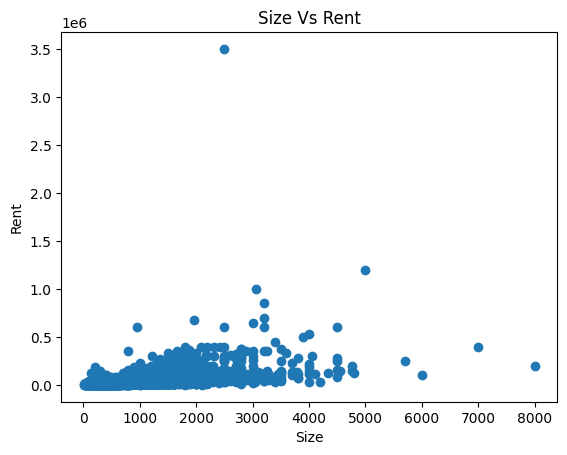

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data.Size,data.Rent)
plt.title("Size Vs Rent")
plt.xlabel('Size')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

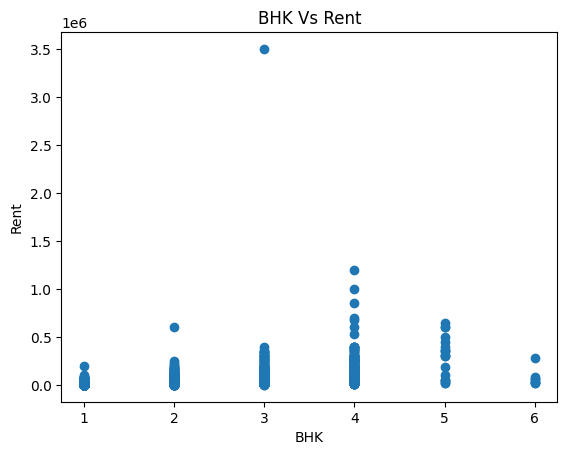

In [24]:
import matplotlib.pyplot as plt
plt.scatter(data.BHK,data.Rent)
plt.title("BHK Vs Rent")
plt.xlabel('BHK')
plt.ylabel('Rent')

Text(0, 0.5, 'Rent')

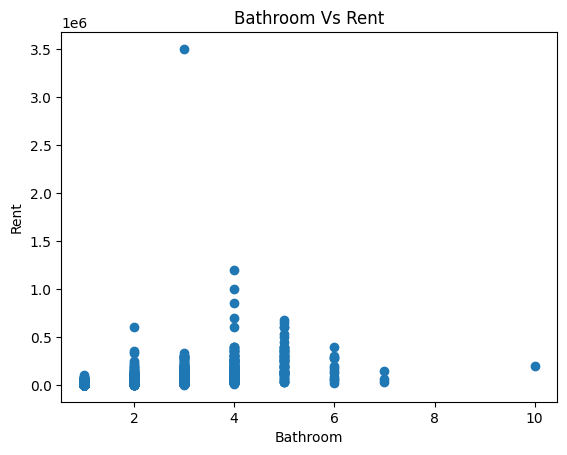

In [25]:
import matplotlib.pyplot as plt
plt.scatter(data.Bathroom,data.Rent)
plt.title("Bathroom Vs Rent")
plt.xlabel('Bathroom')
plt.ylabel('Rent')

Text(0, 0.5, 'Size')

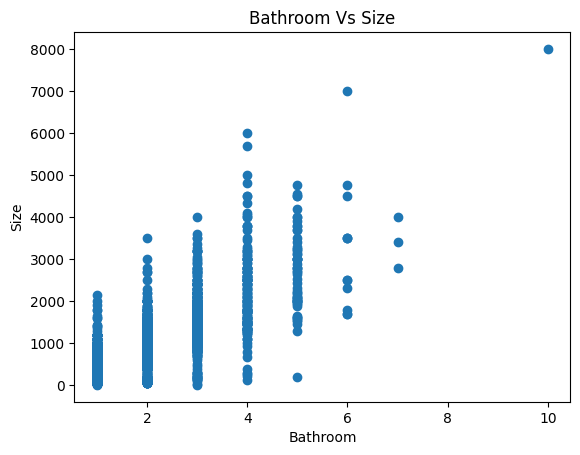

In [26]:
import matplotlib.pyplot as plt
plt.scatter(data.Bathroom,data.Size)
plt.title("Bathroom Vs Size")
plt.xlabel('Bathroom')
plt.ylabel('Size')

In [27]:
y = data['Rent']
x = data['Size']

In [28]:
x

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64

In [29]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

In [30]:
x.shape,y.shape

((4746,), (4746,))

In [31]:
data['Rent'],data['Size']

(0       10000
 1       20000
 2       17000
 3       10000
 4        7500
         ...  
 4741    15000
 4742    29000
 4743    35000
 4744    45000
 4745    15000
 Name: Rent, Length: 4746, dtype: int64,
 0       1100
 1        800
 2       1000
 3        800
 4        850
         ... 
 4741    1000
 4742    2000
 4743    1750
 4744    1500
 4745    1000
 Name: Size, Length: 4746, dtype: int64)

In [32]:
data['Rent'].shape,data['Size'].shape

((4746,), (4746,))

**Train and test split**

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [50]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_train, axis = -1)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4, 1), (120, 4, 1, 1), (120,), (30,))

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [60]:
model.fit(X_train, y_train)

ValueError: Found array with dim 3. LinearRegression expected <= 2.

In [59]:
y_pred = model.predict(X_test)
printf(X_test[0], y_pred[0])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
model.fit(X_train, y_train)

ValueError: Found array with dim 3. LinearRegression expected <= 2.